<a href="https://colab.research.google.com/github/ManelSoengas/DL_Task2/blob/main/DL_task2_Roberta_12_8_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La primera prueba es mediante el conjunto de datos originales. Sin preprocesar y sin aplicar técnicas de aumento de datos y/o balanceo de las muestras.

# **Cargar los recursos necesarios.**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
!pip install transformers
from transformers import BertTokenizer, TFBertForSequenceClassification

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.1 MB/s eta 0:00:00


#**Cargar los datos de entrada**

In [2]:
from sklearn.utils import shuffle
# Cargar datos preprocesados
#train_data = pd.read_csv('/content/EXIST2021_training.tsv', delimiter=',', encoding='latin1')
#test_data = pd.read_csv('/content/EXIST2021_test_labeled.tsv', delimiter=',', encoding='latin1')

test_data = pd.read_csv('/content/EXIST2021_test_labeled.tsv', sep='\t')
train_data = pd.read_csv('/content/swapp_EXIST2021_training.tsv', sep='\t') #swapping data_set training
# Mezclar los datos de entrenamiento
shuffled_train_data = shuffle(train_data, random_state=42)

# Mezclar los datos de prueba
shuffled_test_data = shuffle(test_data, random_state=42)

# **Visualizar estructura de los datos**

In [3]:
shuffled_train_data.head(10)

,test_case,id,source,language,text,task1,task2
2582,EXIST2021,2583,twitter,en,"@CritFacts @NyaVixa You're repeating yourself,...",sexist,ideological-inequality
8482,EXIST2021,452,twitter,en,I eat sooo much I really hope I don t ’ get fat,non-sexist,non-sexist
8061,EXIST2021,1659,twitter,en,MichaelRapaport @ Isn t ' this the same woman ...,non-sexist,non-sexist
10914,EXIST2021,5440,twitter,es,Paulxg_ @ Ponte a trabajar que tengo que ser m...,sexist,stereotyping-dominance
10162,EXIST2021,3614,twitter,es,"SofiaBVilla @ , rebelde , español soda , stere...",non-sexist,non-sexist
5688,EXIST2021,5689,twitter,es,Cuantas vidas ha salvado esta golfa al frente ...,sexist,misogyny-non-sexual-violence
8513,EXIST2021,1468,twitter,en,"* , because that was the BIGGEST - cock block ...",non-sexist,non-sexist
8645,EXIST2021,2739,twitter,en,The Socialist British Commonwealth of India is...,non-sexist,non-sexist
9265,EXIST2021,2722,twitter,en,In Spank “ ” prank we see how a woman is trick...,sexist,sexual-violence
3274,EXIST2021,3275,twitter,en,tw!! sh•••so much fucking bullshit today in my...,sexist,stereotyping-dominance


# **Distribución de la clase objetivo**

In [4]:

columna_clase_objetivo = "task2"

df = shuffled_train_data

# Contar la cantidad de categorías únicas en la columna de la clase objetivo
cantidad_categorias = df[columna_clase_objetivo].nunique()

# Contar la cantidad de muestras para cada categoría de la clase objetivo
muestras_por_categoria = df[columna_clase_objetivo].value_counts()

# Imprimir los resultados
print("Cantidad de categorías:", cantidad_categorias)
print("Muestras por categoría:")
print(muestras_por_categoria)
df.shape[0]

Cantidad de categorías: 6
Muestras por categoría:
non-sexist                      6180
ideological-inequality          1506
stereotyping-dominance          1366
misogyny-non-sexual-violence    1166
sexual-violence                  885
objectification                  874
Name: task2, dtype: int64


11977

# **Carga de los recursos RoBERTa**

In [6]:
def tokenize_roberta(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer_roberta.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            truncation_strategy='longest_first',
            return_attention_mask=True

        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [7]:
tokenizer_roberta = RobertaTokenizerFast.from_pretrained("roberta-base")


# **Configuración**

In [5]:
MAX_LEN=255


In [8]:
X = shuffled_train_data['text'].values
y = shuffled_train_data['task2'].values
Z = shuffled_test_data['text'].values
z = shuffled_test_data['task2'].values

In [9]:
# Dividir los datos en entrenamiento y prueba
train_text, val_text, train_task2, val_task2 = train_test_split(X, y, test_size=0.2, random_state=42)

# **Codificación**

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Crear un objeto LabelEncoder para convertir las etiquetas de clase en valores numéricos
label_encoder = LabelEncoder()

# Ajustar el encoder con los datos de train_task2
label_encoder.fit(train_task2)

# Aplicar la transformación a los conjuntos de datos
train_task2_encoded = label_encoder.transform(train_task2)
val_task2_encoded = label_encoder.transform(val_task2)
z_encoded = label_encoder.transform(z)

# Ahora puedes usar train_task2_encoded, val_task2_encoded y z_encoded en tu modelo de clasificación

# Si deseas codificar las etiquetas de clase como one-hot encoded, utiliza OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# Ajustar el encoder one-hot con las etiquetas codificadas numéricamente
onehot_encoder.fit(train_task2_encoded.reshape(-1, 1))

# Aplicar la transformación one-hot a los conjuntos de datos
train_task2_onehot = onehot_encoder.transform(train_task2_encoded.reshape(-1, 1))
val_task2_onehot = onehot_encoder.transform(val_task2_encoded.reshape(-1, 1))
z_onehot = onehot_encoder.transform(z_encoded.reshape(-1, 1))

# Ahora train_task2_onehot, val_task2_onehot y z_onehot contienen las etiquetas de clase codificadas como one-hot

Estoy utilizando **LabelBinarizer** de Scikit-Learn para convertir las etiquetas de clase en codificación one-hot. La principal diferencia aquí es que uso fit una vez para ajustar el codificador con las etiquetas de clase, y luego uso transform para convertir las etiquetas de cada conjunto de datos (entrenamiento, validación, prueba) en codificación one-hot. Esto asegura que las mismas transformaciones se apliquen a todas las etiquetas, lo que es importante para mantener la consistencia.



In [12]:
from sklearn.preprocessing import LabelBinarizer

etiquetas_clase = ["non-sexist", "ideological-inequality", "stereotyping-dominance", "misogyny-non-sexual-violence", "sexual-violence", "objectification"]

# Crear un objeto LabelBinarizer para convertir las etiquetas de clase en one-hot encoding
label_binarizer = LabelBinarizer()

# Ajustar el LabelBinarizer con las etiquetas de clase
label_binarizer.fit(etiquetas_clase)

# Transformar las etiquetas de clase en one-hot encoding
train_task2_onehot = label_binarizer.transform(train_task2)
val_task2_onehot = label_binarizer.transform(val_task2)
z_onehot = label_binarizer.transform(z)

In [13]:
train_input_ids, train_attention_masks = tokenize_roberta(train_text, MAX_LEN)
val_input_ids, val_attention_masks = tokenize_roberta(val_text, MAX_LEN)
test_input_ids, test_attention_masks = tokenize_roberta(Z, MAX_LEN)

In [14]:
print(train_input_ids.shape)
print(val_input_ids.shape)
print(test_input_ids.shape)

(9581, 255)
(2396, 255)
(4368, 255)


In [15]:
import tensorflow as tf

def create_multiclass_model(bert_model, max_len=MAX_LEN):
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
    #loss = tf.keras.losses.SparseCategoricalCrossentropy()
    #accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    loss = tf.keras.losses.CategoricalCrossentropy()
    input_ids = tf.keras.Input(shape=(max_len,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,), dtype='int32')
    output = bert_model([input_ids, attention_masks])
    output = output[1]

    # Agregar Dropout
    output = tf.keras.layers.Dropout(0.5)(output)

    # Cambiar la salida para clasificación multiclase (6 clases)
    output = tf.keras.layers.Dense(6, activation='softmax')(output)

    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)

    # Compilar el modelo
    # Cambiar la métrica de BinaryAccuracy a CategoricalAccuracy
    accuracy = tf.keras.metrics.CategoricalAccuracy()

    # Compilar el modelo
    model.compile(opt, loss=loss, metrics=[accuracy])

    # Agregar Early Stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss')

    return model, early_stopping


In [16]:
roberta_model = TFRobertaModel.from_pretrained('roberta-base')


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['roberta.embeddings.position_ids', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [17]:
#model = create_model(roberta_model, MAX_LEN)
model, early_stopping = create_multiclass_model(roberta_model, MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 255)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 255)]        0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  124645632  ['input_1[0][0]',                
 el)                            thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 255,                                           

In [18]:
history_2 = model.fit([train_input_ids,train_attention_masks], train_task2_onehot, validation_data=([val_input_ids,val_attention_masks], val_task2_onehot), epochs=8, batch_size=16)


Epoch 1/8
599/599 [==============================] - 672s 1s/step - loss: 1.2638 - categorical_accuracy: 0.5608 - val_loss: 1.0593 - val_categorical_accuracy: 0.6119
Epoch 2/8
599/599 [==============================] - 576s 962ms/step - loss: 0.8881 - categorical_accuracy: 0.6808 - val_loss: 0.8899 - val_categorical_accuracy: 0.6678
Epoch 3/8
599/599 [==============================] - 575s 960ms/step - loss: 0.6712 - categorical_accuracy: 0.7627 - val_loss: 0.9919 - val_categorical_accuracy: 0.6511
Epoch 4/8
599/599 [==============================] - 536s 895ms/step - loss: 0.5021 - categorical_accuracy: 0.8253 - val_loss: 0.7561 - val_categorical_accuracy: 0.7604
Epoch 5/8
599/599 [==============================] - 536s 894ms/step - loss: 0.3492 - categorical_accuracy: 0.8826 - val_loss: 0.7092 - val_categorical_accuracy: 0.7980
Epoch 6/8
599/599 [==============================] - 575s 959ms/step - loss: 0.2589 - categorical_accuracy: 0.9110 - val_loss: 0.6791 - val_categorical_accura

In [19]:
result_roberta = model.predict([test_input_ids,test_attention_masks])


137/137 [==============================] - 78s 545ms/step


In [20]:
# Evaluar el modelo
evaluation = model.evaluate([test_input_ids, test_attention_masks], z_onehot)

# Imprimir los resultados de la evaluación
print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

137/137 [==============================] - 75s 546ms/step - loss: 1.9192 - categorical_accuracy: 0.6200
Loss: 1.9191787242889404
Accuracy: 0.6199633479118347


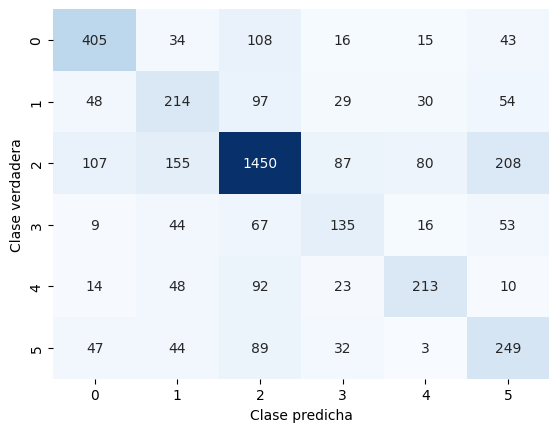

In [31]:
y_pred_roberta =  np.zeros_like(result_roberta)
y_pred_roberta[np.arange(len(y_pred_roberta)), result_roberta.argmax(1)] = 1


#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que z_test.argmax(1) son las etiquetas reales y y_pred_roberta.argmax(1) son las etiquetas predichas
cm = confusion_matrix(z_onehot.argmax(1), y_pred_roberta.argmax(1))

# Crear un heatmap de la matriz de confusión
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Añadir etiquetas a los ejes
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")

# Mostrar el gráfico
plt.show()

# **Resultados**


---

Para 5 epochs, lr = 0.00001, batch_size = 16 y sin preprocesar ni ampliar los datos se obtiene:

##Training

```
Epoch 1/5
349/349 [==============================] - 400s 992ms/step - loss: 1.3658 - categorical_accuracy: 0.5264 - val_loss: 1.0761 - val_categorical_accuracy: 0.5960
Epoch 2/5
349/349 [==============================] - 327s 937ms/step - loss: 1.0530 - categorical_accuracy: 0.6110 - val_loss: 1.0580 - val_categorical_accuracy: 0.5903
Epoch 3/5
349/349 [==============================] - 328s 941ms/step - loss: 0.8974 - categorical_accuracy: 0.6784 - val_loss: 0.9694 - val_categorical_accuracy: 0.6454
Epoch 4/5
349/349 [==============================] - 326s 935ms/step - loss: 0.7558 - categorical_accuracy: 0.7323 - val_loss: 0.9782 - val_categorical_accuracy: 0.6461
Epoch 5/5
349/349 [==============================] - 326s 935ms/step - loss: 0.6219 - categorical_accuracy: 0.7803 - val_loss: 1.0826 - val_categorical_accuracy: 0.6246
```
##Evaluación:


```
Loss: 1.183659553527832
Accuracy: 0.6103479862213135
```




Para 8 epochs, lr = 0.00001 y batch_size = 16, sin preprocesar los datos pero ampliando los datos de train mediante técnica swapping se obtiene:

##Training:


```
Epoch 1/8
599/599 [==============================] - 672s 1s/step - loss: 1.2638 - categorical_accuracy: 0.5608 - val_loss: 1.0593 - val_categorical_accuracy: 0.6119
Epoch 2/8
599/599 [==============================] - 576s 962ms/step - loss: 0.8881 - categorical_accuracy: 0.6808 - val_loss: 0.8899 - val_categorical_accuracy: 0.6678
Epoch 3/8
599/599 [==============================] - 575s 960ms/step - loss: 0.6712 - categorical_accuracy: 0.7627 - val_loss: 0.9919 - val_categorical_accuracy: 0.6511
Epoch 4/8
599/599 [==============================] - 536s 895ms/step - loss: 0.5021 - categorical_accuracy: 0.8253 - val_loss: 0.7561 - val_categorical_accuracy: 0.7604
Epoch 5/8
599/599 [==============================] - 536s 894ms/step - loss: 0.3492 - categorical_accuracy: 0.8826 - val_loss: 0.7092 - val_categorical_accuracy: 0.7980
Epoch 6/8
599/599 [==============================] - 575s 959ms/step - loss: 0.2589 - categorical_accuracy: 0.9110 - val_loss: 0.6791 - val_categorical_accuracy: 0.8280
Epoch 7/8
599/599 [==============================] - 574s 959ms/step - loss: 0.1859 - categorical_accuracy: 0.9375 - val_loss: 0.7405 - val_categorical_accuracy: 0.8335
Epoch 8/8
599/599 [==============================] - 574s 958ms/step - loss: 0.1465 - categorical_accuracy: 0.9520 - val_loss: 0.7109 - val_categorical_accuracy: 0.8376
```
##Evaluación:


```
137/137 [==============================] - 75s 546ms/step - loss: 1.9192 - categorical_accuracy: 0.6200
Loss: 1.9191787242889404
Accuracy: 0.6199633479118347
```



